# GJ3470

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'GJ3470'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

In [4]:
obs

GJ-3470 [6 Visits]

In [5]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

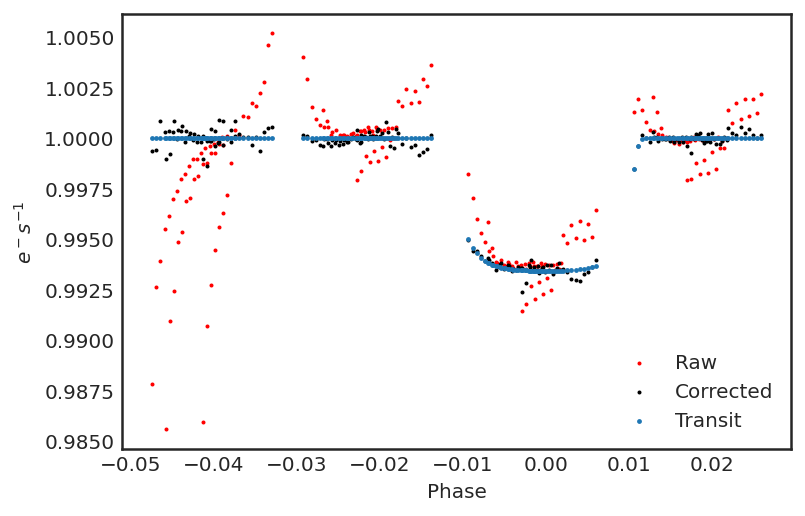

In [6]:
obs.plot()

In [7]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  17%|█▋        | 1/6 [00:18<01:33, 18.79s/it]

Fitting Transit/Eclipse Model:  33%|███▎      | 2/6 [00:38<01:17, 19.46s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 3/6 [00:57<00:57, 19.32s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 4/6 [01:15<00:37, 18.72s/it]

Fitting Transit/Eclipse Model:  83%|████████▎ | 5/6 [01:33<00:18, 18.39s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 6/6 [01:51<00:00, 18.34s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 6/6 [01:51<00:00, 18.62s/it]

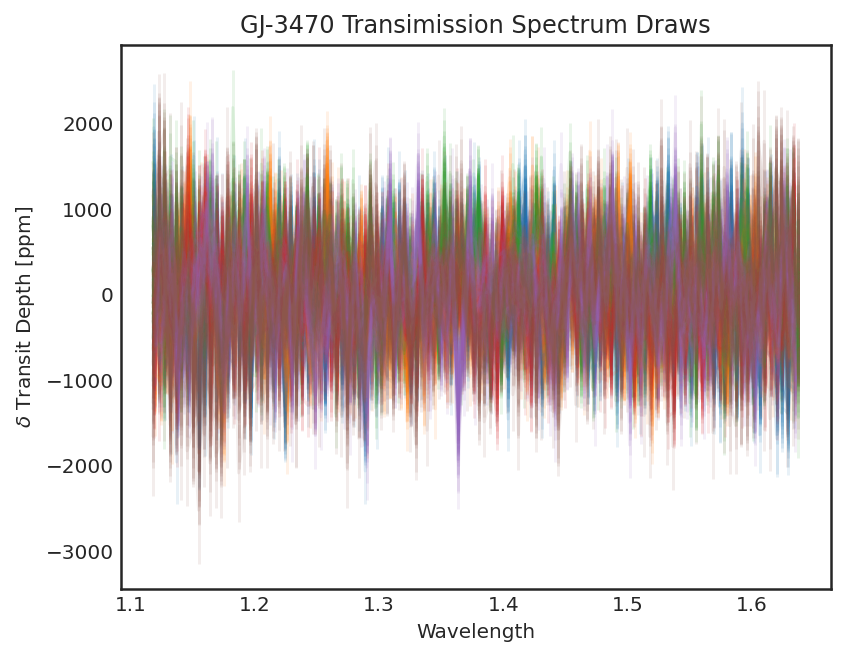

In [8]:
obs.plot_spectra()

<AxesSubplot:title={'center':'GJ-3470 Transmission Spectrum, Visit: 2'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

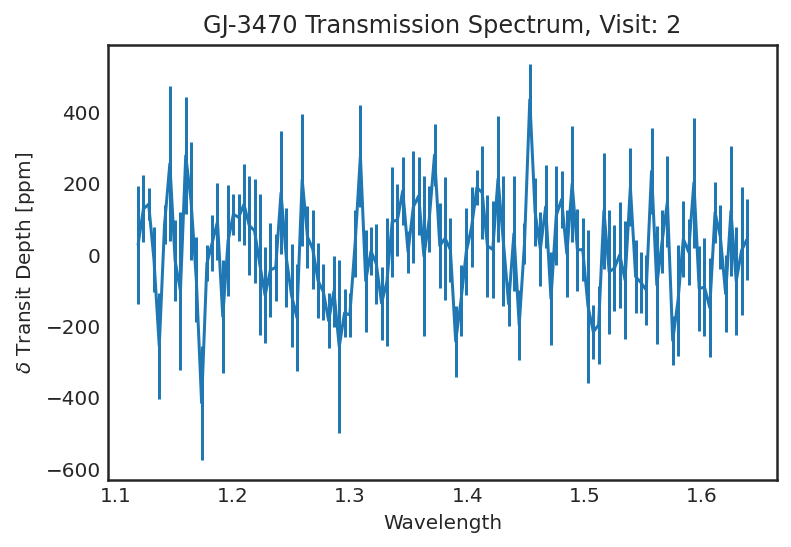

In [9]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

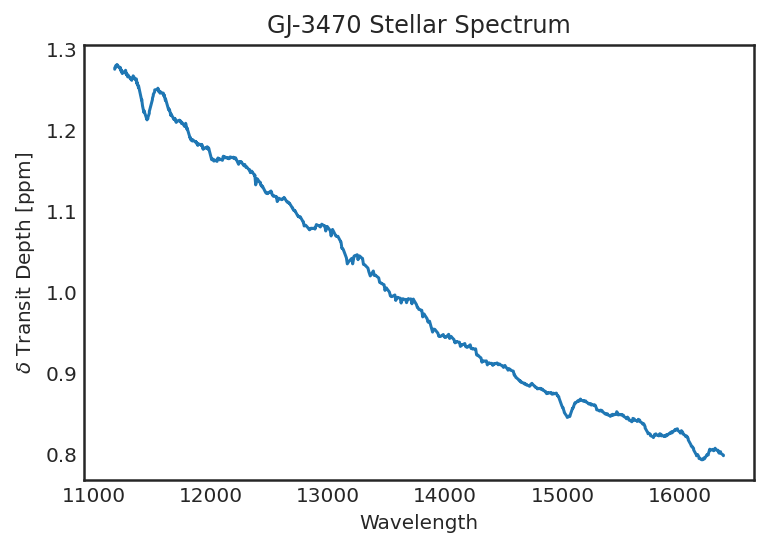

In [10]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [11]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

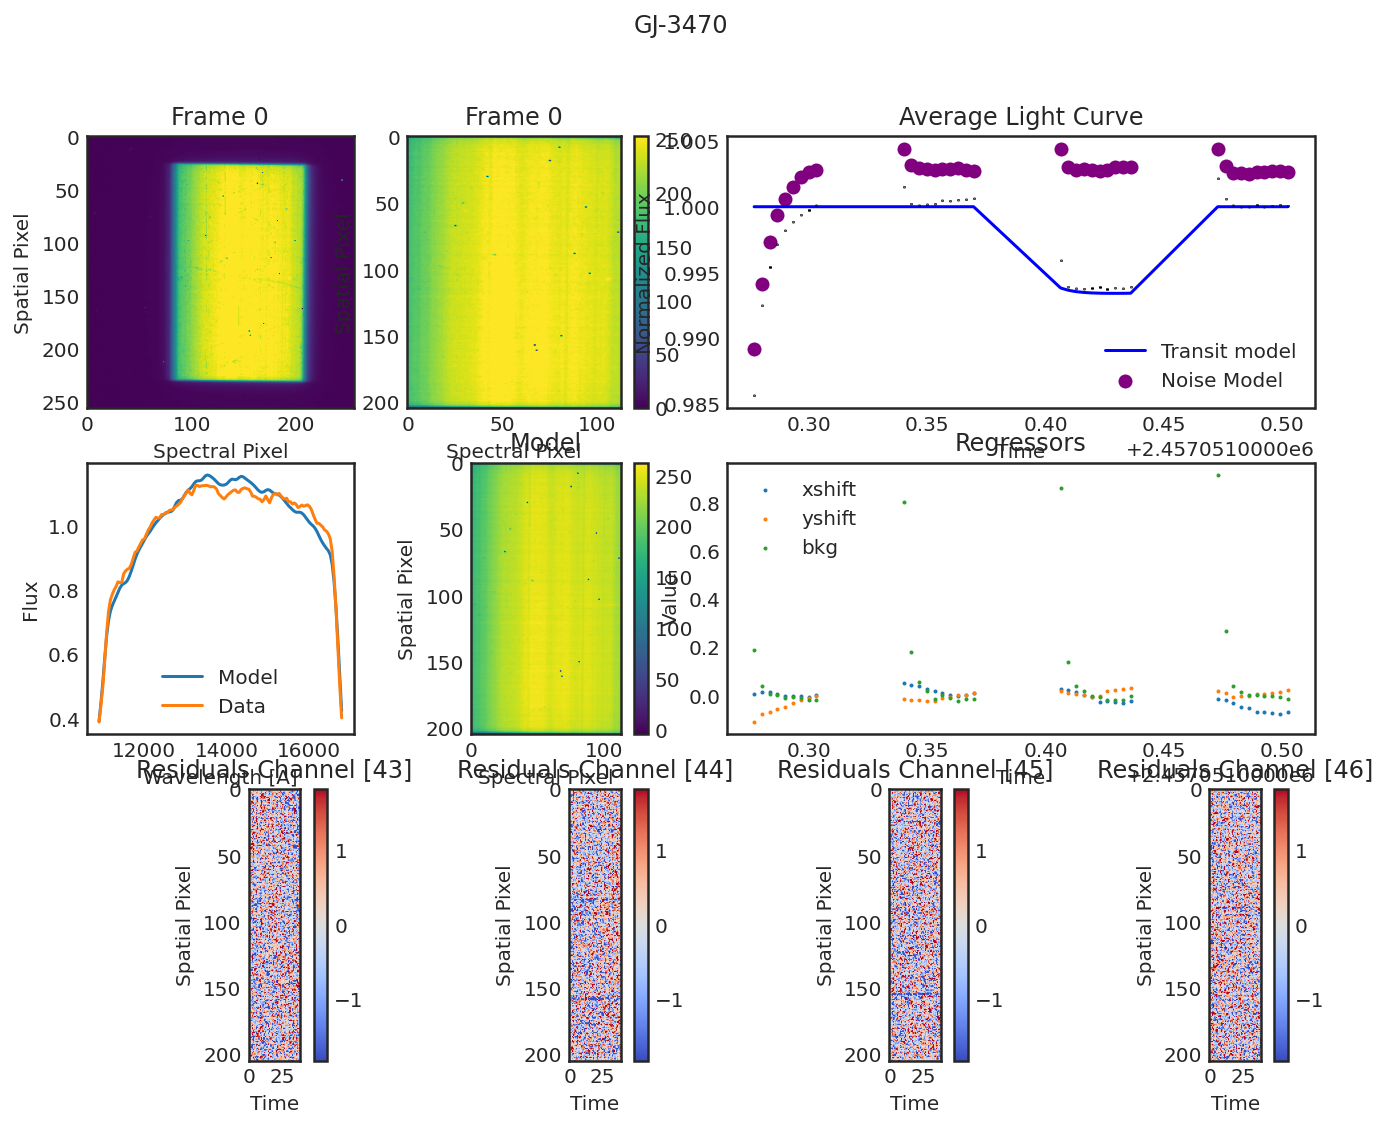

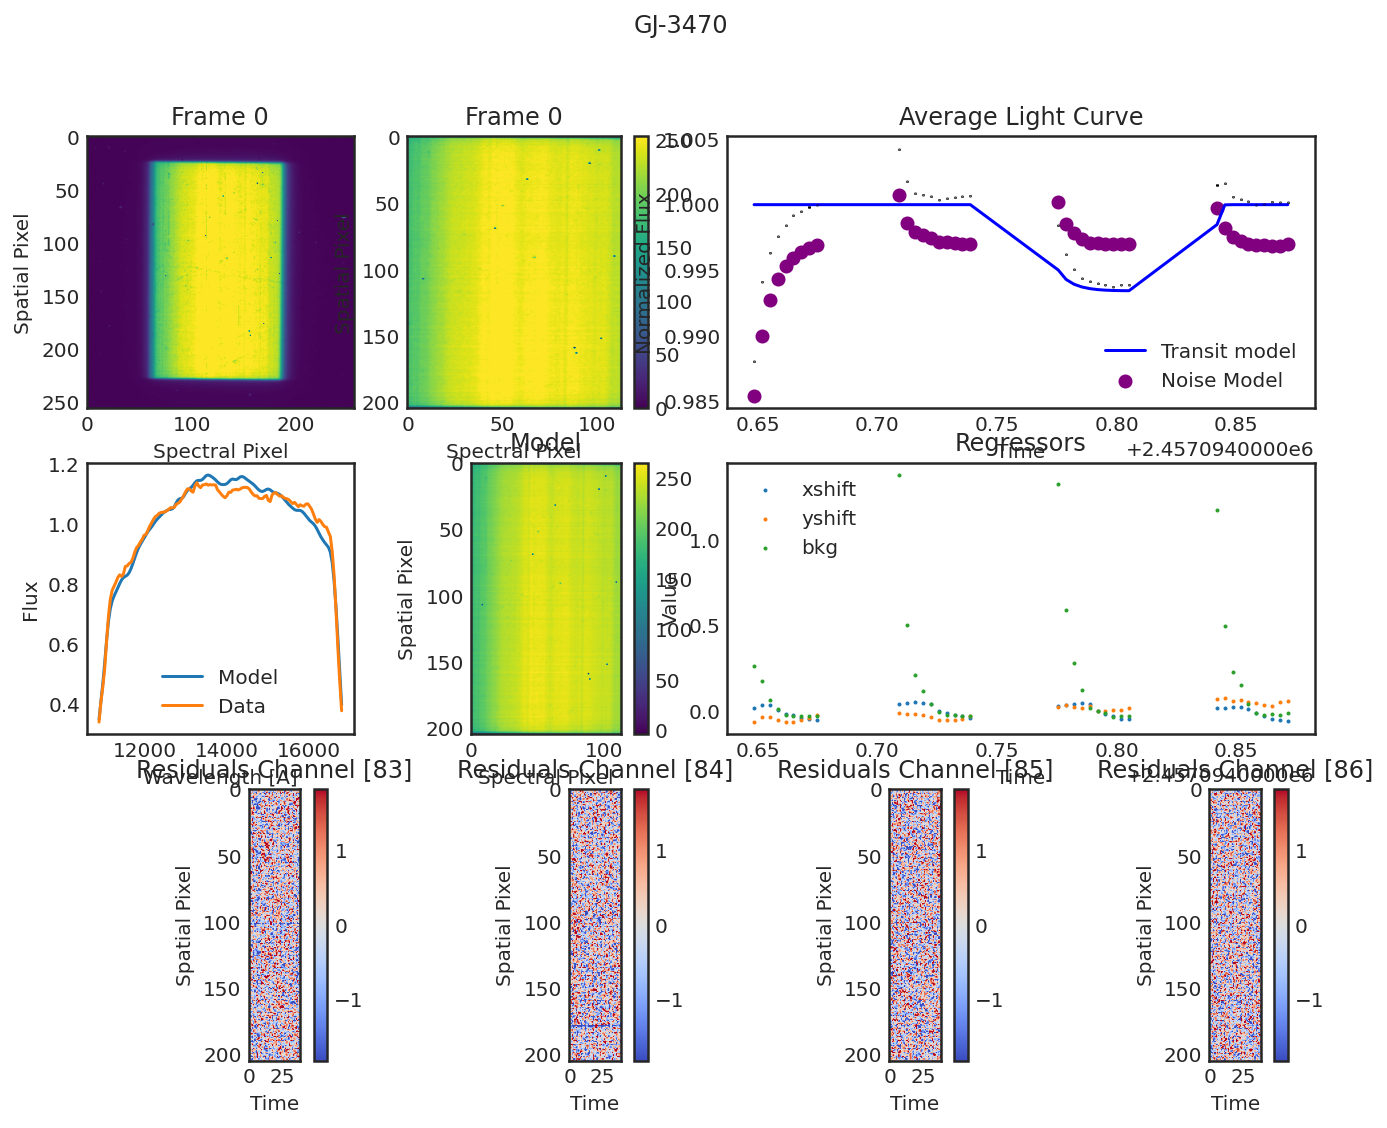

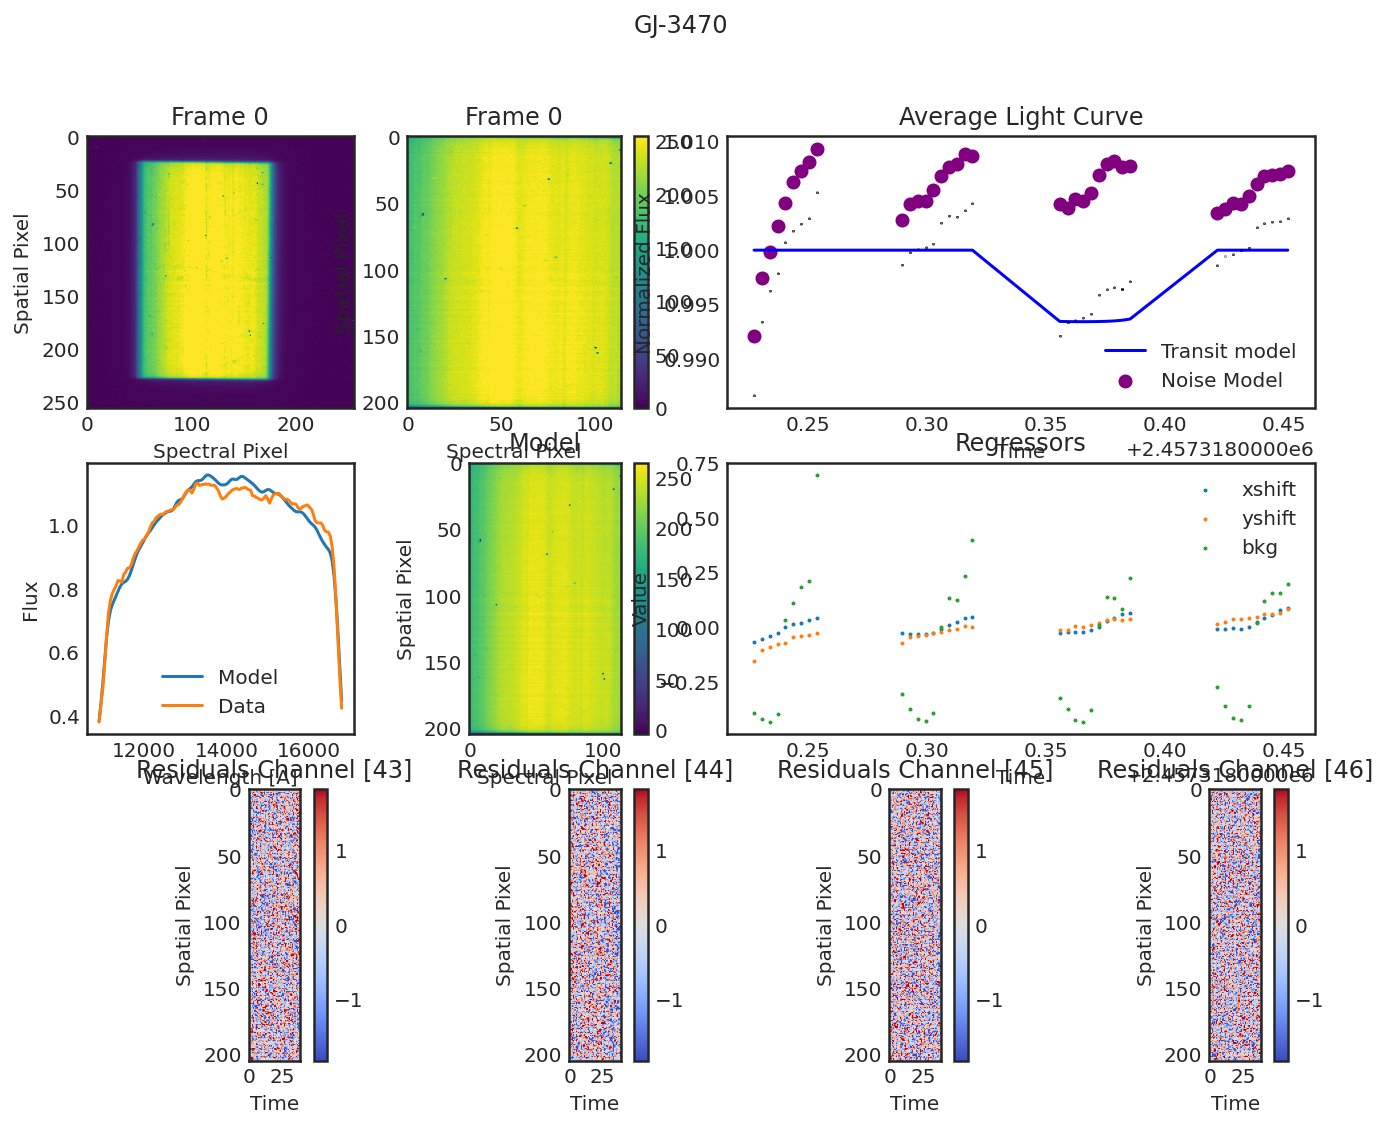

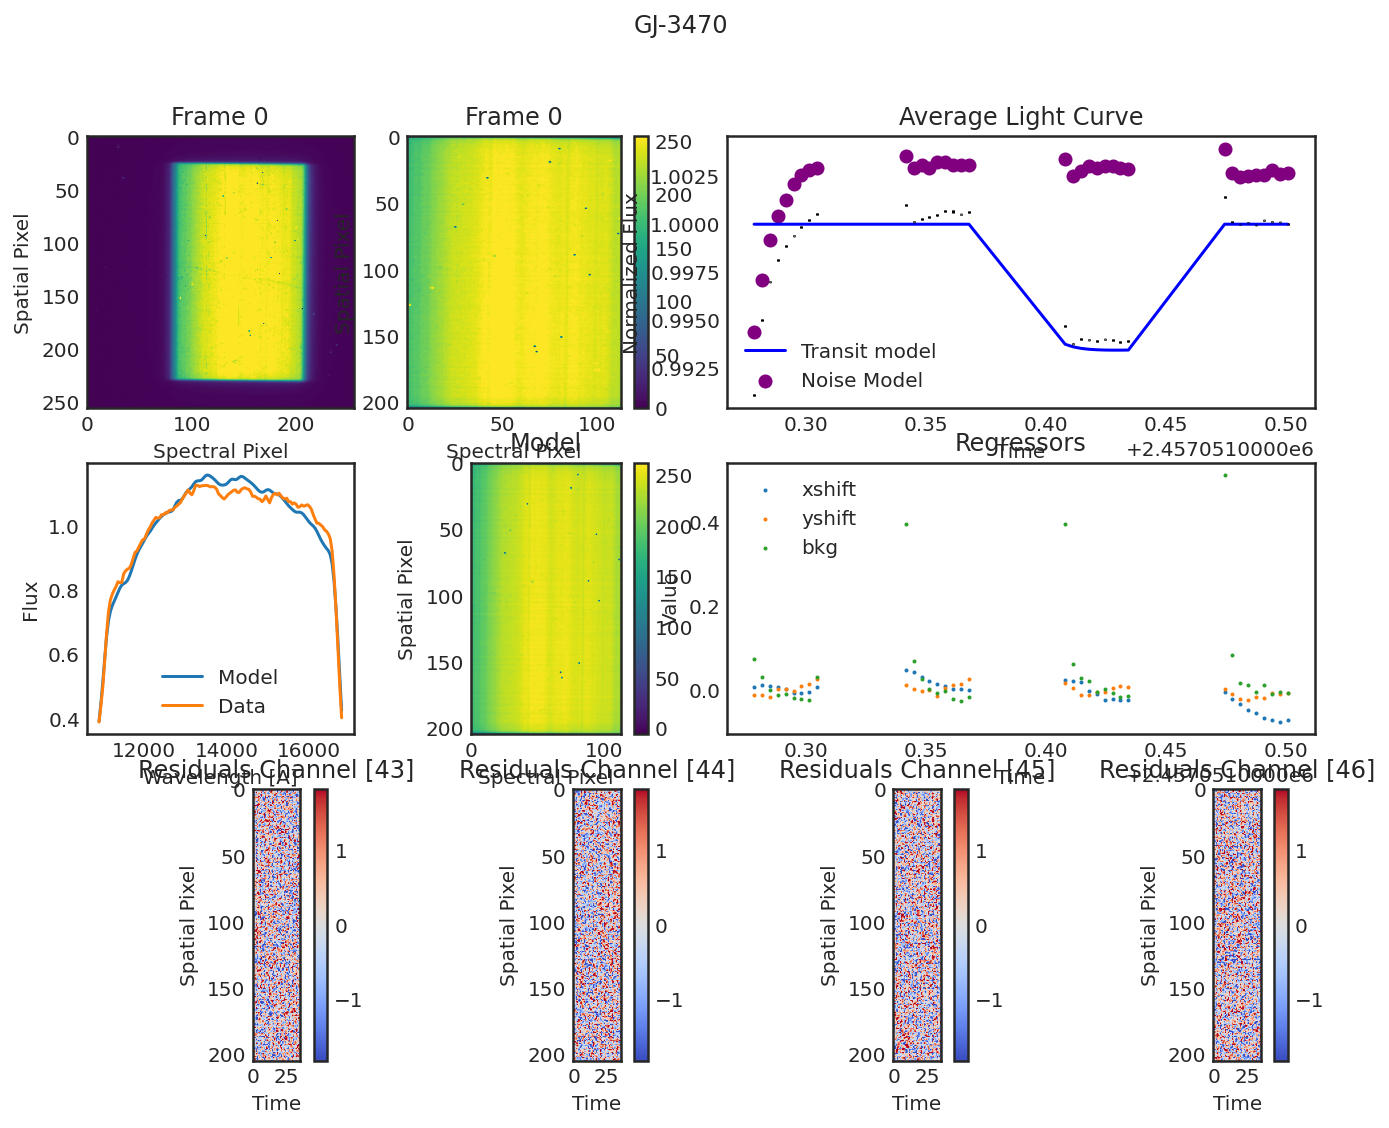

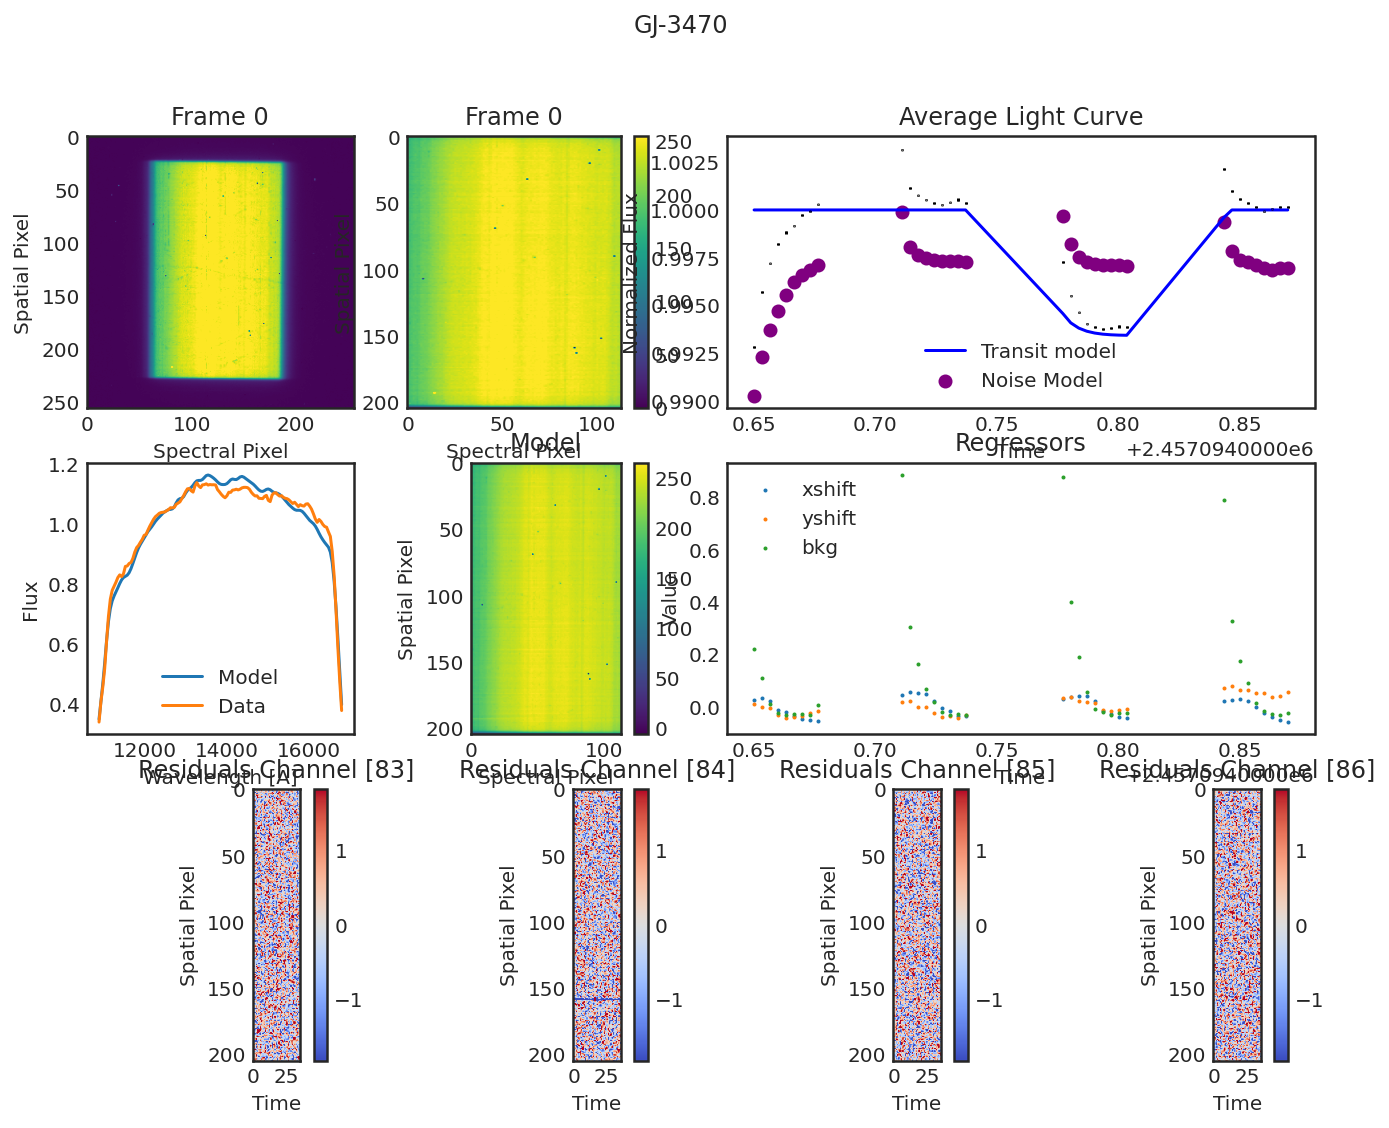

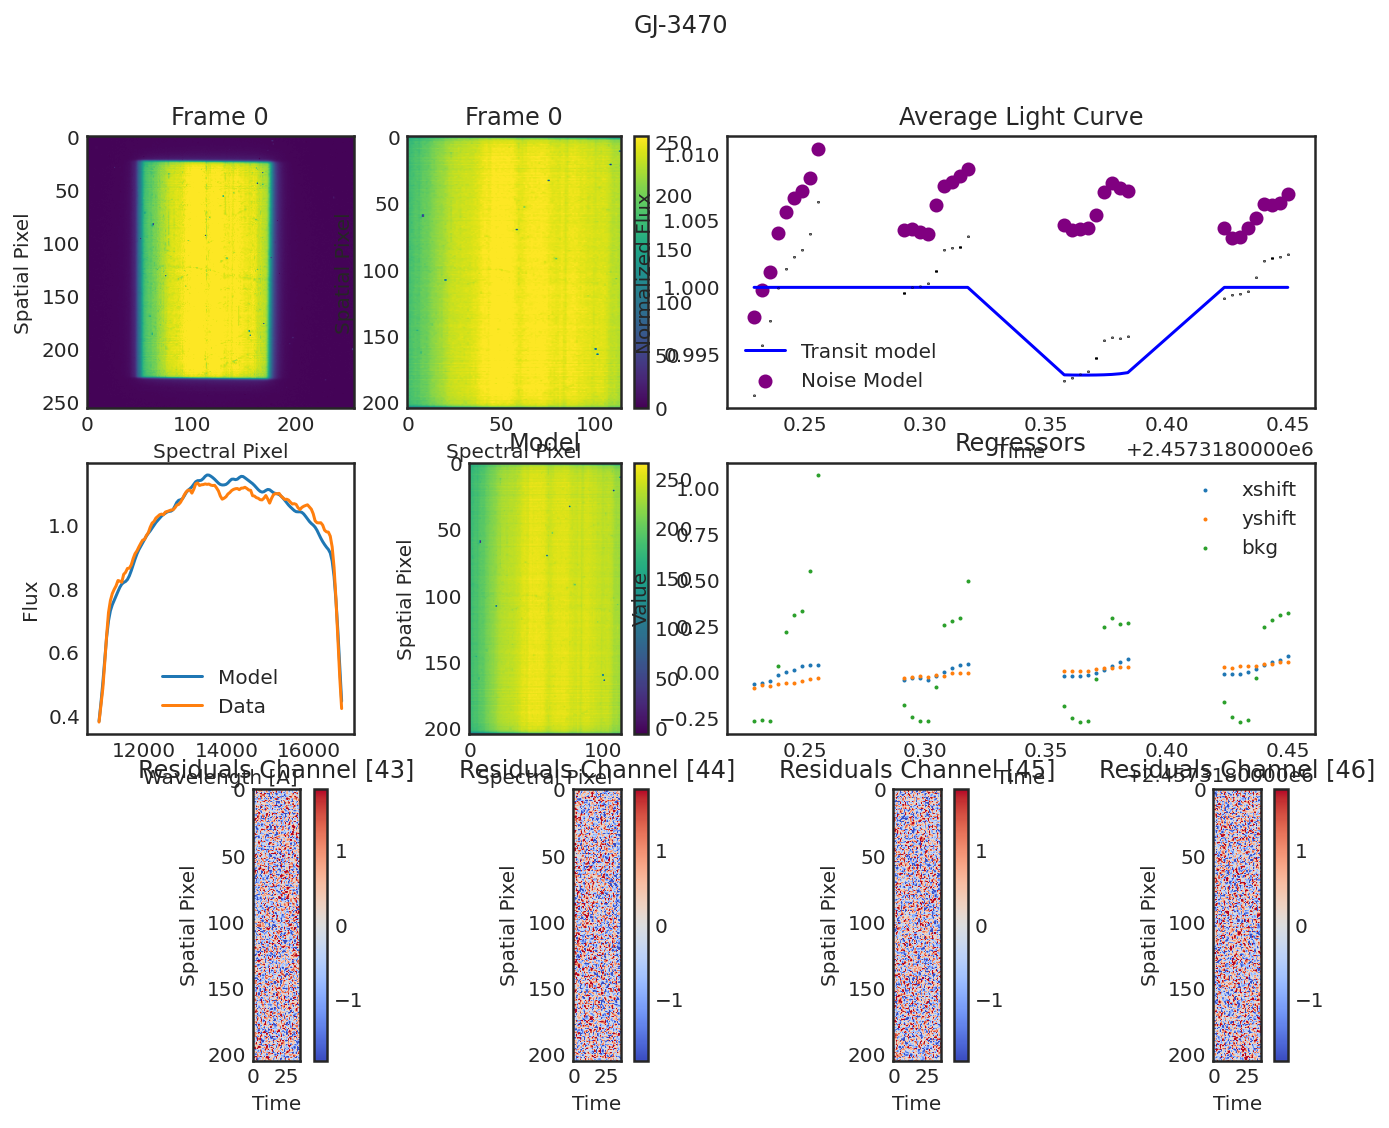

In [12]:
for visit in obs:
    visit.diagnose();
    plt.show();